In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

In [2]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X,Y))
    return Y

In [5]:
def minimize():
    Xguess = 2.0
    min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
    print("Minima found at:")
    print("X = {}, Y = {}".format(min_result.x, min_result.fun))
    
    #plot function values, mark minima
    Xplot = np.linspace(.5, 2.5, 21)
    Yplot = f(Xplot)
    plt.plot(Xplot, Yplot)
    plt.plot(min_result.x, min_result.fun, 'ro')
    plt.title("Minima of an objective function")
    plt.show()

X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [ 1.5], Y = 0.5
X = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


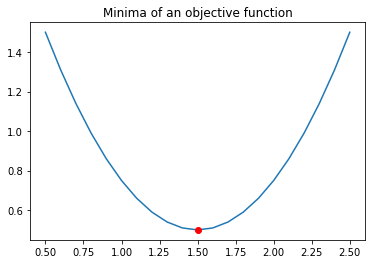

In [6]:
if __name__ == "__main__":
    minimize()

In [5]:
def error(line, data):
    """Compute error between given line model and observed data
    
    Parameters
    -----------
    line: tuple/list/array (C0,C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x,y) 
    
    Returns error as a single real value
    """
    #Metric: sum of squared Y-axis differences
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1])) ** 2)
    return err

In [6]:
def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.
    
    Parameters
    -----------
    data: 2D array where each row is a point (X0,Y)
    error_func: function that computes the error between a line and observed data
    
    Returns line that minimizes the error function.
    """
    
    #Generate initial guess for the line model
    l = np.float32([0, np.mean(data[:,1])]) #slope = 0, intercept = mean(y values)
    
    #plot initial guess
    x_ends = np.float32([-5,5])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth = 2.0, label = "Initial Guess")
    
    #call optimizer to minimize error function
    result = spo.minimize(error_func,l,args=(data,), method = 'SLSQP', options={'disp':True})
    return result.x

In [7]:
def line_fit_test():
    #define og line
    l_og = np.float32([4,2])
    print("Og line: C0 = {}, C1 = {}".format(l_og[0], l_og[1]))
    Xog = np.linspace(0, 10, 21)
    Yog = l_og[0] * Xog + l_og[1]
    plt.plot(Xog,Yog, 'b--', linewidth=2.0, label = "Og Line")
    
    #generate noise
    noise_sigma = 3.0
    noise = np.random.normal(0, noise_sigma, Yog.shape)
    data = np.asarray([Xog, Yog + noise]).T
    plt.plot(data[:,0], data[:, 1], 'go', label = "Data Points")
    
    #Try to fit a line to this data
    l_fit = fit_line(data, error)
    print("Fitted line: c0 = {}, C1 = {}".format(l_fit[0], l_fit[1]))
    plt.plot(data[:,0], l_fit[0] * data[:,0] + l_fit[1], 'r--', linewidth = 2.0, label = "try to fit")
    plt.show()

Og line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 178.3588945380264
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: c0 = 3.9641239387046783, C1 = 2.381848092925644


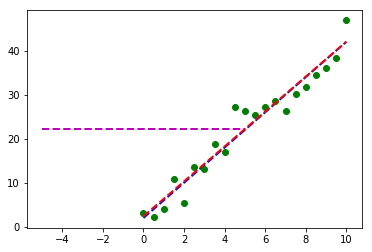

In [8]:
if __name__ == '__main__':
    line_fit_test()

In [10]:
def error_poly(C,data):
    """
    Compute error betwen given polynomial and observed data.
    
    Parameters
    ----------
    C: numpy.poly1d object or equivalent array representing polynomial coefs
    data: 2D array where each row is a point (x,y)
    
    Returns error as a single real value.
    """
    
    #Metric: Sum of squared Y-axis differences
    err = np.sum((data[:,1] - np.polyval(C, data[:,0])) ** 2)
    return err

def fit_poly(data, error_func, degree = 3):
    """Fit a polynomial to given data, usinng supplied error function.
    
    Parameters
    ----------
    data: 2D array where each row is a point (x,y)
    error_func: function that computes error betwen given polynomial and observed data.
    
    Returns polynomial that minimizes the error function."""
    
    #Generate initial guess for polynomial model (all coefs = 1)
    Cguess = np.poly1d(np.ones(degree + 1, dtype = np.float32))
    
    #plot initial guess
    x = np.linspace(-5,5,21)
    plt.plot(x, np.polyval(guess,x), 'm--', linewidth = 2.0, label = "Inital Guess")
    
    #call optimizer to minimize error funciton
    result = spo.minimize(error_func, Cguess, args=(data,), method = 'SLSQP', options={'disp':True})
    return np.poly1d(result.x) #converrt optimal result into a poly1D object